# Step 1 Data Preperation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

### Section 1. Load and visualize the data
- Download
- Load
- Visualize
- Normalization

-0.03779466168006855 0.9920801322508517


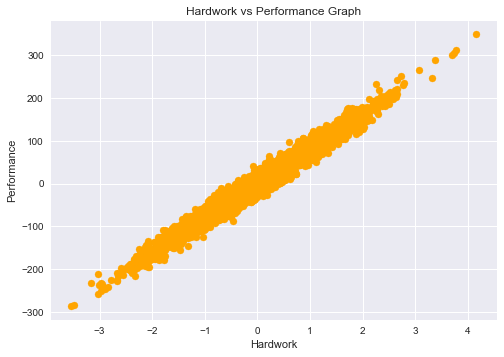

In [2]:
# 1.Load
X = pd.read_csv('Training Data/Linear_X_Train.csv')
Y = pd.read_csv('Training Data/Linear_Y_Train.csv')
# Convert X,Y to numpy
X = X.values
Y = Y.values

# Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

print(u,std)

# Visualize training data
plt.style.use('seaborn')
plt.scatter(X,Y,c='orange')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()



In [5]:
print(X.shape,Y.shape) 
type(X)

(3750, 1) (3750, 1)


numpy.ndarray

# Section 2 - Linear Regression

In [6]:
def hypothesis(x,theta):
    # theta is a vector which contains two theta values,theta=[theta0,theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta): # X and Y means all values
    m = X.shape[0] # shape[0] means no. of rows or no. of examples
    grad = np.zeros((2,)) # or you could also do like this:-grad = np.array([0.0,0.0])
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_-y)
        grad[1] += (y_-y)*x
    return grad/m # this division by m will divide both the gradients grad[0] and grad[1] by m

def error(X,Y,theta):       #Function to find the j(theta) or the mean squared error.Although it is not directly needed in finding the theta,but we will use to find out the plots.We can write this function later also.
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m
        
    # It helps us to check that whether we are actually minimizing error or not,we need to write the error function.
def gradientDescent(X,Y,max_steps = 100,learning_rate = 0.1): # learning rate is a hyper parameter ie we will have to test the different values of hyperparameter , and check which performs the best for the Algo.
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        #Compute grad(gradient) using gradient function
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        #Update theta
        theta[0] = theta[0]-learning_rate*grad[0]
        theta[1] = theta[1]-learning_rate*grad[1]
        theta_list.append((theta[0],theta[1]))
    return theta,error_list,theta_list
    

In [7]:
theta,error_list,theta_list = gradientDescent(X,Y)

In [8]:
theta

array([ 0.6838508 , 79.90361453])

In [42]:
# error_list
theta_list # it stores how the theta was changing in every iteration

[(0.06838689680155924, 7.990573694249979),
 (0.12993510392296198, 15.182090019074964),
 (0.18532849033222443, 21.654454711417454),
 (0.23518253810056078, 27.479582934525695),
 (0.2800511810920641, 32.72219833532309),
 (0.3204329597844162, 37.44055219604077),
 (0.35677656060753327, 41.68707067068668),
 (0.3894858013483388, 45.508937297867995),
 (0.41892411801506385, 48.94861726233117),
 (0.4454186030151161, 52.044329230348026),
 (0.46926363951516337, 54.83047000156319),
 (0.490724172365206, 57.337996695656855),
 (0.5100386519302443, 59.594770720341145),
 (0.5274216835387786, 61.62586734255701),
 (0.5430664119864597, 63.45385430255129),
 (0.5571466675893725, 65.09904256654615),
 (0.569818897631994, 66.57971200414151),
 (0.5812239046703536, 67.91231449797735),
 (0.591488411004877, 69.11165674242959),
 (0.6007264667059482, 70.19106476243661),
 (0.6090407168369123, 71.16253198044294),
 (0.6165235419547797, 72.03685247664862),
 (0.6232580845608605, 72.82374092323374),
 (0.6293191729063334, 7

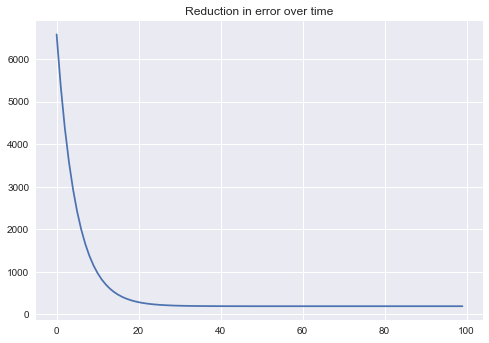

In [10]:
plt.plot(error_list)
plt.title("Reduction in error over time")
plt.show()

# Section - 3 Predictions and Best Line

In [11]:
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


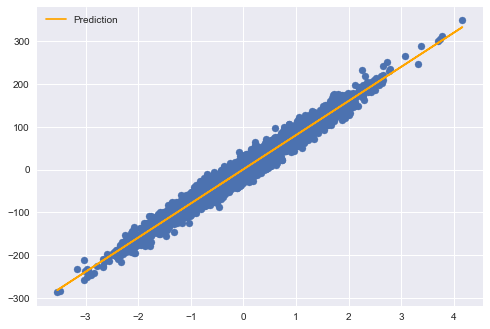

In [12]:
# Training + Predictions
plt.scatter(X,Y)
plt.plot(X,y_,c='orange',label = "Prediction")
plt.legend()


In [13]:
# Load the Test Data
X_test = pd.read_csv('E:\CB-Archives\HardworkPaysOff_Dataset\Test Cases/Linear_X_Test.csv')
y_test = hypothesis(X_test,theta)

y_test.shape

(1250, 1)

In [14]:
df = pd.DataFrame(data=y_test)
df.columns=['y']



In [15]:
df.to_csv('y_prediction.csv',index = False)

## Section - 4 Computing Score
#### - R2(R-Squared) or Coefficient of Determination

In [16]:
def r2_score(Y,Y_):
    # Instead of loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2) 
    denom = np.sum((Y-Y.mean())**2)
    score = (1-num/denom)
    return score*100 # to get the score in terms of percentage

In [17]:
r2_score(Y,y_)

97.09612226971643

## Section - 5 Visualising Loss Function,Gradient Descent,Theta Updates

In [19]:
# plot of loss function
theta

array([ 0.6838508 , 79.90361453])

In [47]:
# (Loss Actually)
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1) # It returns all possible combinations between T0 and T1
# After applying meshgrid function on T0 and T1 -> the no. of rows in T0 matrix = no. of elements in T1 matrix
# and no. or columns in T1 matrix = no. of elements in To matrix   
J = np.zeros(T0.shape)
for i in range(J.shape[0]): # J.shape[0]=80
    for j in range(J.shape[1]):# J.shape[1]=80
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j]=np.sum((Y-y_)**2)/Y.shape[0]

print(J)
print(J.shape) # 80 X 80 points for theese many values i know the loss function
#print(T0.shape)
# print(T0)
# print(T1)

[[3438.6006145  3358.23287657 3279.86513863 ... 3102.28479343
  3175.91705549 3251.54931756]
 [3359.78914062 3279.42140268 3201.05366475 ... 3023.47331954
  3097.10558161 3172.73784367]
 [3282.97766673 3202.6099288  3124.24219086 ... 2946.66184566
  3020.29410772 3095.92636979]
 ...
 [3222.11712536 3141.74938742 3063.38164949 ... 2885.80130428
  2959.43356635 3035.06582841]
 [3297.30565147 3216.93791354 3138.5701756  ... 2960.9898304
  3034.62209246 3110.25435453]
 [3374.49417759 3294.12643965 3215.75870172 ... 3038.17835651
  3111.81061858 3187.44288064]]
(80, 80)


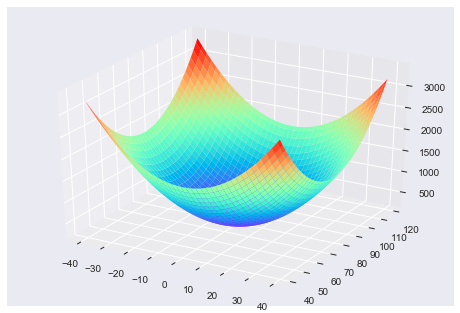

In [48]:
# Lets visualize J
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')# cmap='coolwarm'
plt.show()

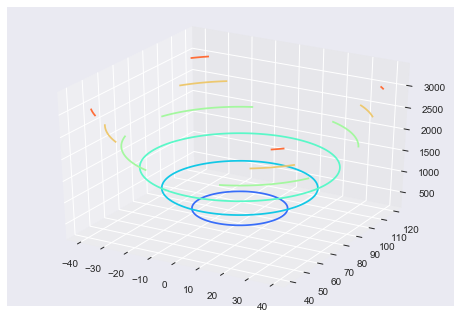

In [49]:
# Contour plots (they are very helpful to understand the nature of the loss function)
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

### Visualizing the theta updates ,ie how frequently or by what magnitude the value of theta is going to change(for that we will maintain a history of theta)

#### plot tha changes in value of theta

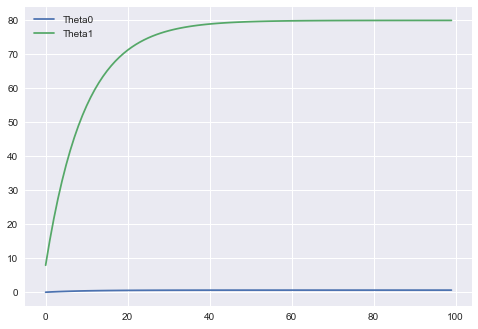

In [50]:
theta_list = np.array(theta_list)
# theta_list
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()
# we can observe from the plot that the changes in values of Theta1 are very large and the changes in value of Theta0 are very small, there by the line for Theta0 looks like a straight line but it isn't  straight line 

## Another visualization-Trajectory traced by theta updates in the Loss Function

#### In this visualization  how the value of theta is changed in that bowl shaped figure,ie does it arrive at the local minima or not.

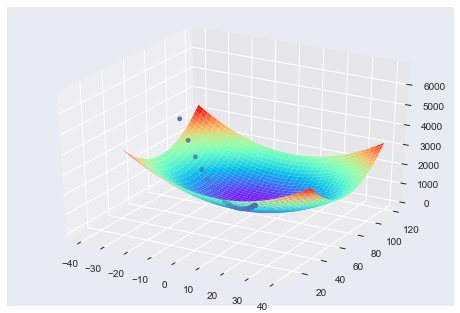

In [51]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()


#### Drawing same on contour,ie drawing the trajectory of the changing values of theta in each iteration with the respective loss function values on a countour plot , as we have done above on a plot surface

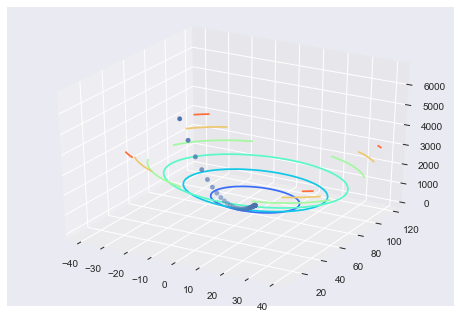

In [55]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

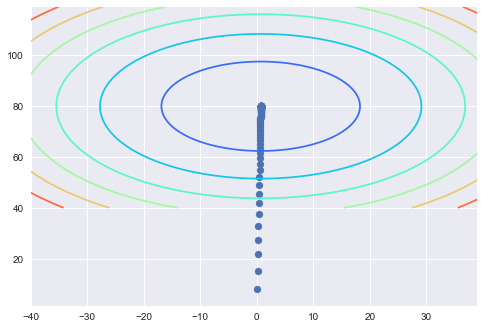

In [59]:
# 2D contour plot(Top view)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [60]:
#save the data file
np.save("ThetaList.npy",theta_list)